<a href="https://colab.research.google.com/github/marcelo5g/data_science/blob/main/Analisando_dados_do_Airbnb_Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**


---

# Análise dos Dados do Airbnb - *Los Angeles*

<img alt="Los Angeles" width="50%" src="https://images.unsplash.com/photo-1503891450247-ee5f8ec46dc3?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80">

Photo by <a href="https://unsplash.com/@thisisflik?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Steven Pahel</a> on <a href="https://unsplash.com/s/photos/los-angeles?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Los Angeles, na California, uma das cidades mais caras dos EUA e epicentro cultural de produções hollywoodianas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2021-02-07/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir uma compreensão de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - grupo de bairros (distrito)
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a situação do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
# Por padrão o head() lista as 5 primeiras, mas posso passar algum argumento, por exemplo, head(10)
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,2016-05-15,0.02,1,0
1,2708,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,71,30,28,2020-11-08,0.34,2,315
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,2019-12-27,0.18,2,365
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,NaN,1,0
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,42,30,310,2020-04-29,2.20,4,1


In [ ]:
# Podemos também listar os nomes de todos os Bairros
df['neighbourhood'].unique()

array(['Culver City', 'Hollywood', 'Santa Monica', 'Bellflower',
       'Del Rey', 'Atwater Village', 'Long Beach', 'Venice',
       'Redondo Beach', 'Mid-Wilshire', 'Harbor Gateway',
       'Hollywood Hills', 'Torrance', 'Mid-City', 'Valley Village',
       'East Hollywood', 'Silver Lake', 'Highland Park',
       'Mount Washington', 'Sawtelle', 'West Los Angeles',
       'Woodland Hills', 'Los Feliz', 'Malibu', 'Hollywood Hills West',
       'Downtown', 'Van Nuys', 'Lynwood', 'Glendale', 'Mar Vista',
       'Beverly Hills', 'Carthay', 'Harvard Heights', 'Glassell Park',
       'West Hollywood', 'La Mirada', 'Cheviot Hills', 'Encino',
       'Lakewood', 'View Park-Windsor Hills', 'North Hills', 'Tujunga',
       'Westchester', 'Echo Park', 'Fairfax', 'Carson', 'North Hollywood',
       'Altadena', 'Calabasas', 'Pacific Palisades', 'Topanga',
       'Manhattan Beach', 'Unincorporated Santa Monica Mountains',
       'Elysian Valley', 'Palms', 'Pico-Robertson', 'Sun Valley',
       'Korea

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui, isto é, quantas linhas, e ver as variáveis, os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv há uma versão mais completa com mais entradas e variáveis

As análises realizadas nesse estudo preliminar buscam a familiarização com a base de dados. Para estudos mais elaborados que possam impactar decisões de negócios, recomendamos trabalhar com a base de dados completa.

In [ ]:
# identificar o volume de dados do DataFrame
# identificar o volume de dados do DataFrame
print(f"Entradas: {df.shape[0]}") 
print(f"Variáveis: {df.shape[1]}")


Entradas: 31900
Variáveis: 16


In [ ]:
#Verificar os Tipos das variáveis do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# Valores Ausentes (True = Possui valores ausentes / False = Não possui valores ausentes )
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31895,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
31896,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
31897,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
31898,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
# Somar os valores de 0 (False - Linhas cheias) e 1 (True - valores ausentes) para cada coluna
df.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                           35
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7681
reviews_per_month                 7681
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
# Dividir os valores ausentes pelo numero total de entradas -> Gera um valor em %
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.240784
last_review                       0.240784
host_name                         0.001097
name                              0.000031
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

 - É possível ver que as colunas das variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 25% das linhas
 - A variável `host_name` tem aproximadamente 0,1% dos valores nulos

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, podemos plotar o **histograma.**

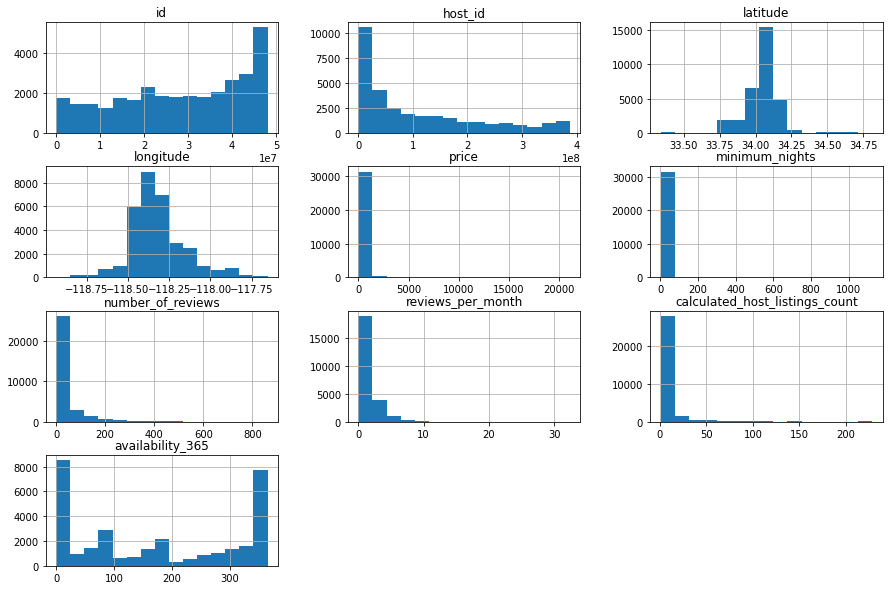

In [ ]:
# plotar o histograma das variáveis numéricas
# bins = Quantidade de Barras / Figsize = (Largura / Altura)
# ";" No final oculta texto de saída de alocação de memória
df.hist(bins=15, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

A visualização acima ficou prejudicada devido aos *outliers* e intervalos muito distorcidos, o que dificulta chegar a conclusões mais concretas.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* por exemplo nas variáveis `price`, `minimum_nights`e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras que auxiliam a detecção de *outliers*. São elas:
 - Resumo estatístico por meio do método `describe()`
 - Plotar `boxplot` para a variável

In [ ]:
# Ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31900.000000,31900.000000,31900.000000,24219.000000,31900.000000,31900.000000
mean,221.941787,18.963448,33.537555,1.344370,9.782445,173.333354
std,596.518883,32.383104,65.172255,1.600823,26.471126,144.259092
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,2.000000,1.000000,0.220000,1.000000,7.000000
50%,110.000000,30.000000,6.000000,0.740000,2.000000,161.000000
75%,189.000000,30.000000,35.000000,1.950000,5.000000,337.000000
max,21053.000000,1125.000000,862.000000,32.360000,228.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

 - A variável `price` possui 75% do valor abaixo de 189, porém seu valor máximo é 21053.
 - A quantidade mínima de noites (`minimum_nights`) possui um valor máximo de 1125 noites, estando assim acima de 365 dias no ano, evidenciando o *outlier*

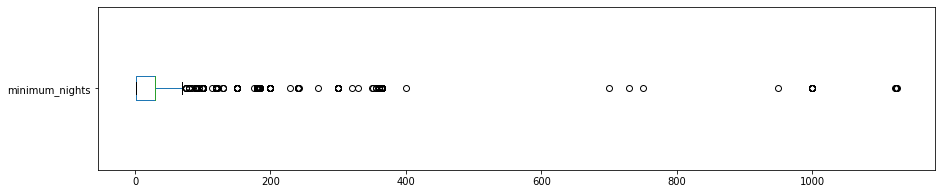

In [ ]:
# Boxplot para minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [ ]:
# ver a quantidade de valores acima de 60 dias para minimum_nights
print("minimum_nights: valores acima de 60: ")
print(f"{len(df[df.minimum_nights  > 60])} entradas ")
print(f"{(len(df[df.minimum_nights  > 60]) / df.shape[0]) * 100:.4f} %")

minimum_nights: valores acima de 60: 
426 entradas 
1.3354 %


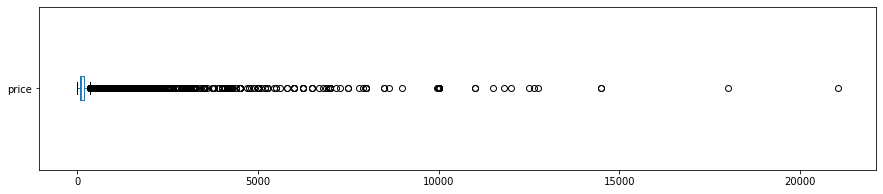

In [ ]:
# Boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

In [ ]:
# ver quantidade de valores acima de 1000 para price
print("price: valores acima de 1000: ")
print(f"{len(df[df.price  > 1000])} entradas ")
print(f"{(len(df[df.price  > 1000]) / df.shape[0]) * 100:.4f} %")

price: valores acima de 1000: 
865 entradas 
2.7116 %


**Histograma sem outliers**

Já que identificamos *outliers* nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma

In [ ]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 60].index, axis=0, inplace=True)

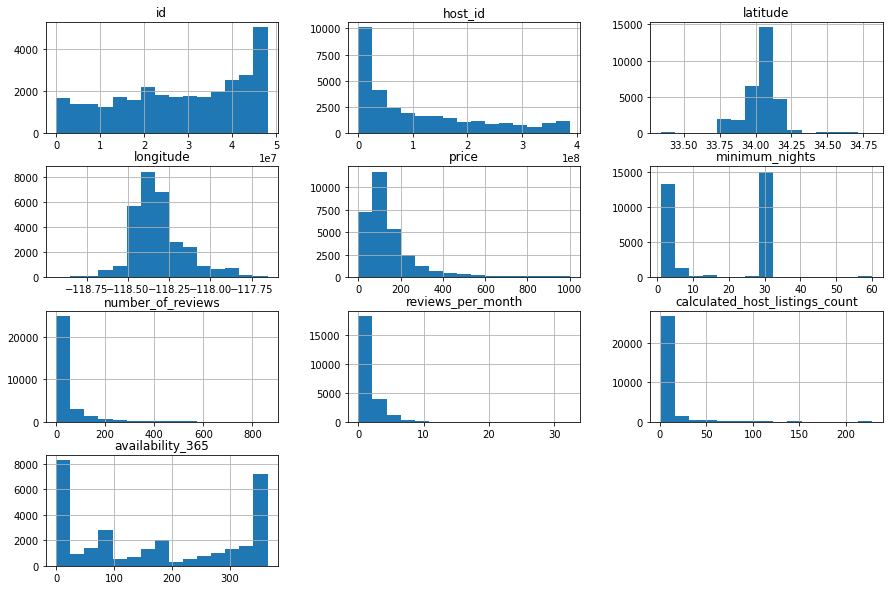

In [ ]:
#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Com isso, percebe-se que a visualização da distrituição dos preços fica bem melhor. Notamos uma concentração muito grande de acomodações abaixo dos $200 

Por outro lado, em relação a `minimum_nights` um fenômeno curioso pode ser percebido. Temos uma concentração abaixo das 5 noites mínimas exigidas pelos proprietários porém uma barra ainda maior mostra uma grande quantidade de proprietários que exigem o mínimo de 30 noites, sugerindo um modelo similar ao aluguel mensal ou por temporada.

---

*Why stay a weekend when you can stay a mounth?*

<img alt="Los Angeles Houses" width="50%" src="https://images.unsplash.com/photo-1532417916091-2f3ccd458e71?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80">

Photo by <a href="https://unsplash.com/@jaredd_craig?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Jaredd Craig</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhanças entre duas variáveis.

Essa relação pode ser medida, e é função do **coeficiente de correlação** estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, nós iremos:
 - Criar uma matriz de correlação
 - Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()

In [ ]:
# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.036068,-0.052111,-0.035291,0.018033,0.085427
minimum_nights,-0.036068,1.000000,-0.163536,-0.317568,0.152699,0.044673
number_of_reviews,-0.052111,-0.163536,1.000000,0.718638,-0.121108,0.051543
reviews_per_month,-0.035291,-0.317568,0.718638,1.000000,-0.101634,0.062388
calculated_host_listings_count,0.018033,0.152699,-0.121108,-0.101634,1.000000,0.178030
availability_365,0.085427,0.044673,0.051543,0.062388,0.178030,1.000000


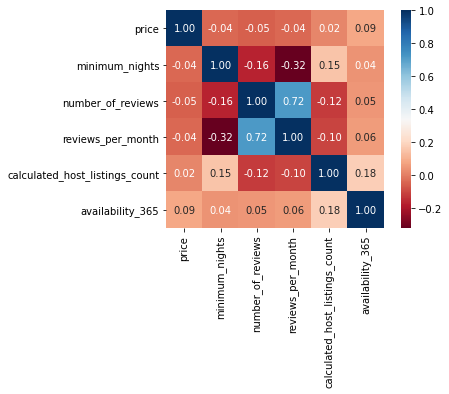

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no site. Se você já alugou um, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    19673
Private room        9761
Shared room         1054
Hotel room           138
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() /  df_clean.shape[0]

Entire home/apt    0.642363
Private room       0.318716
Shared room        0.034415
Hotel room         0.004506
Name: room_type, dtype: float64

Podemos perceber, portanto, que a opção Apartamento / Casa inteira aparece em primeiro lugar com quase 65% dos registros. Isso faz sentido levando em consideração a grande quantidade de imóveis que exige um mínimo de 30 dias, conforme apresentado na Questão 3.

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()` No caso, queremos comparar os bairros (neighbourhoods) com o preço de locação


In [ ]:
# ver preços por bairros, na média, dos 10 mais caros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Leona Valley                             720.000000
Malibu                                   493.494624
Bel-Air                                  394.703704
Beverly Crest                            356.780822
Avalon                                   356.701149
Unincorporated Santa Monica Mountains    345.201835
Hollywood Hills West                     329.725146
Rolling Hills Estates                    307.666667
Rolling Hills                            304.666667
Commerce                                 304.000000
Name: price, dtype: float64

In [ ]:
# ver quantidade de imóveis em Leona Valley
print(df_clean[df_clean.neighbourhood == "Leona Valley"].shape)

(1, 16)


Nesse ponto devemos tomar cuidado, pois poderíamos ser induzidos a afirmar que o bairro mais caro de Los Angeles é Leona Valley, porém, como podemos verificar acima, o bairro possui apenas um imóvel em nosso *DataSet* o que acaba distorcendo um pouco a distribuição, induzindo o cientista desatento à **conclusões precipitadas.**

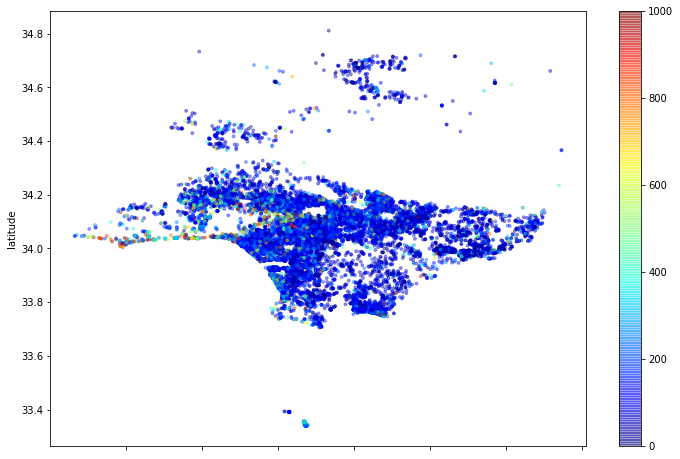

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

16.734669888330178

In [ ]:
df_clean['minimum_nights'].describe()

count    30626.000000
mean        16.734670
std         14.285748
min          1.000000
25%          2.000000
50%         28.000000
75%         30.000000
max         60.000000
Name: minimum_nights, dtype: float64

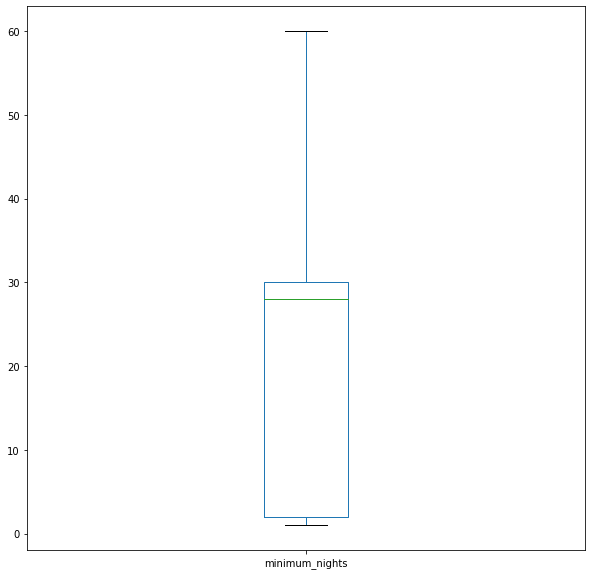

In [ ]:
# Boxplot para minimum nights
df_clean.minimum_nights.plot(kind='box', figsize=(10, 10))
plt.show()

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com os 106 atributos disponíveis.

Além disso, verificamos também a grande quantidade de imóveis que exigem um mínimo de 30 noites, e que a opção Apartamento/Casa se destaca bastante. Isso possivelmente sugere um a tendência dos usuários em alugar Apartamento/Casas inteiras por longos períodos configurando quase um modelo de aluguel convencional e não estadias curtas de fim de semana típica de turistas casuais.